# Data Preprocessing



### Importing the required libraries

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from pyecharts.charts import Bar
from pyecharts import options as opts
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from pandas import Series, DataFrame
import nltk
import json
import re
import csv
from tqdm import tqdm
import sys
import urllib.request
import urllib.parse
import json
import time
import re
%matplotlib inline

### Loading the data

In [81]:
books_data = pd.read_csv('../data/books_data.csv')
ratings_data = pd.read_csv('../data/books_ratings_data.csv')
book_tags_data = pd.read_csv('../data/book_tags_data.csv')
tags_data = pd.read_csv('../data/tags_data.csv')

### Understanding the loaded data and checking shape

In [82]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [83]:
books_data.shape

(10000, 23)

### Understanding the null values in the dataset

In [84]:
books_data.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

<AxesSubplot:>

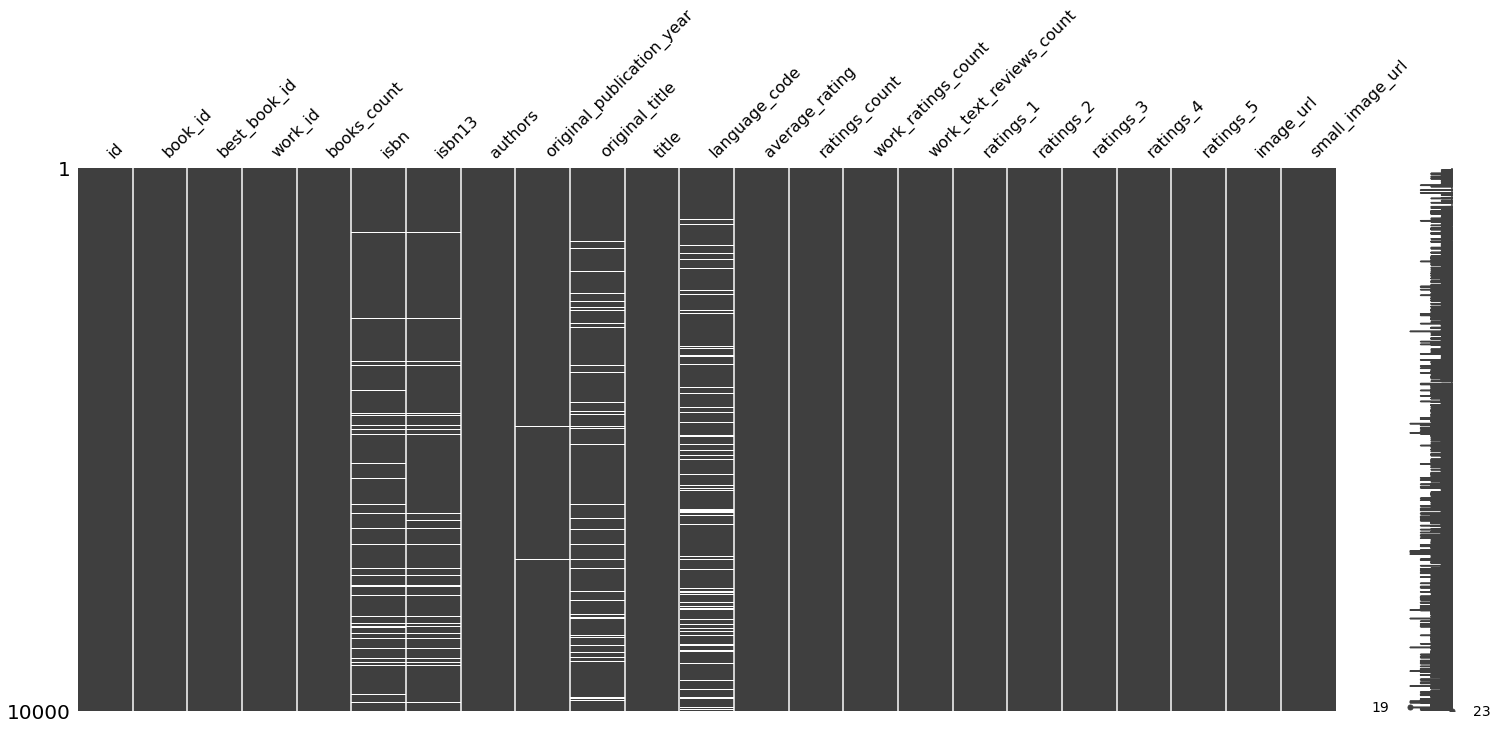

In [85]:
msno.matrix(books_data)

### Removing unnecessary columns

Since isbn13 is more precise form of coding than isbn which is just a 10 digit number so with the presence of isbn13 we wont be needing isbn. So dropping isbn from the dataset.

Similarly, best_book_id is the book id of the latest version of the book available, so we feel that we wont be needing the book_id since we already have best_book_id.

Apart form that original title too is a redundant column because of the presence of title column.

In [86]:
books_data = books_data.drop(['book_id', 'isbn','original_title'], axis=1)

### Handling nulls in the dataset by imputing the values of language code (text data)

### Now as we know, the column 'language_code' has a lot of null values. So we will try to impute these null values.

In [87]:
nan_in_col  = books_data[books_data['language_code'].isna()]

In [88]:
nan_in_col

,id,best_book_id,work_id,books_count,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
44,45,4214,1392700,264,9.780770e+12,Yann Martel,2001.0,Life of Pi,NaN,3.88,1003228,1077431,42962,39768,74331,218702,384164,360466,https://images.gr-assets.com/books/1320562005m...,https://images.gr-assets.com/books/1320562005s...
131,132,3431,2561472,123,9.781401e+12,Mitch Albom,2003.0,The Five People You Meet in Heaven,NaN,3.90,449501,474699,16682,12360,33669,107800,155830,165040,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
203,204,5326,3097440,2380,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,NaN,4.02,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
236,237,10592,1552134,249,9.781417e+12,Stephen King,1974.0,Carrie,NaN,3.93,356814,377650,8264,4564,19479,96352,136054,121201,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
287,288,19691,1112006,117,9.780425e+12,Tom Clancy,1984.0,"The Hunt for Red October (Jack Ryan Universe, #4)",NaN,4.01,270318,278255,2117,9470,13707,49906,95296,109876,https://images.gr-assets.com/books/1281995542m...,https://images.gr-assets.com/books/1281995542s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,9973,849380,4370,52,9.780610e+12,"John M. Gottman, Nan Silver",1999.0,The Seven Principles for Making Marriage Work:...,NaN,4.19,8868,10017,749,126,334,1604,3446,4507,https://images.gr-assets.com/books/1320521960m...,https://images.gr-assets.com/books/1320521960s...
9973,9974,116494,827585,38,9.780553e+12,Lois Lowry,1978.0,"Anastasia Krupnik (Anastasia Krupnik, #1)",NaN,3.89,11914,12519,389,440,603,3062,4185,4229,https://images.gr-assets.com/books/1476942137m...,https://images.gr-assets.com/books/1476942137s...
9976,9977,202948,851165,55,9.780804e+12,Anne Tyler,1995.0,Ladder of Years,NaN,3.72,11209,12229,949,214,854,3714,4827,2620,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9985,9986,183092,176939,16,9.780310e+12,Terri Blackstock,2006.0,Night Light (Restoration #2),NaN,4.35,8471,8862,218,96,172,1115,2658,4821,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


### As from the above analysis we can see that 1084 rows have null values. This number of data is huge and cannot be ignored.

### To solve this problem, lets take a small subset of data from the large dataset. 
### In the below example I am taking the subset of data whose author is 'Charles Dickens'

In [89]:
charlesDickens = books_data[books_data['authors']=='Charles Dickens']
charlesDickens

,id,best_book_id,work_id,books_count,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
159,160,2623,2612809,1725,9.780193e+12,Charles Dickens,1860.0,Great Expectations,eng,3.75,459247,507187,12311,22811,44293,120385,170702,148996,https://images.gr-assets.com/books/1327920219m...,https://images.gr-assets.com/books/1327920219s...
203,204,5326,3097440,2380,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,NaN,4.02,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
2845,2846,5344,6751955,773,9.780321e+12,Charles Dickens,1854.0,Hard Times,eng,3.50,34675,42170,2098,1604,4753,14259,13967,7587,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5871,5872,9748274,14637456,33,9.780142e+12,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912,15072,179,445,904,2935,5051,5737,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5906,5907,31244,2888469,378,9.780376e+12,Charles Dickens,1865.0,Our Mutual Friend,eng,4.07,18599,20659,1102,434,986,3803,6936,8500,https://images.gr-assets.com/books/1403189244m...,https://images.gr-assets.com/books/1403189244s...
6189,6190,229432,3315230,615,9.780140e+12,Charles Dickens,1837.0,The Pickwick Papers,eng,3.82,17080,20011,1175,537,1496,5076,6842,6060,https://images.gr-assets.com/books/1360795072m...,https://images.gr-assets.com/books/1360795072s...


### Applying the lambda function to replace the null values with the languages of the author who have written any other book in the dataset. We can pick the language code from any other book written by the author and can replace the null values. 

### Just like we have done for Charles Dickens, The book with title 'The Christmas Carol' was missing the language code in the above dataset, but from the dataset we know Charles Dickens has written multiple books in English. So we will impute the values and replace the null values with the language code of the mode value obtained. 

### This way  we were able to retrieve around 50% of the missing values from the dataset.

In [90]:
books_data['language_code'].fillna('unknown',inplace=True)
books_data['language_code'] = books_data.groupby('authors')['language_code'].transform(lambda x: x.replace('unknown',(x.mode()[0])))

### Now checking the data of Charles Dickens again we can see that the author of A Christmas Carol is imputed correctly

In [91]:
charlesDickens = books_data[books_data['authors']=='Charles Dickens']
charlesDickens

,id,best_book_id,work_id,books_count,isbn13,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
159,160,2623,2612809,1725,9.780193e+12,Charles Dickens,1860.0,Great Expectations,eng,3.75,459247,507187,12311,22811,44293,120385,170702,148996,https://images.gr-assets.com/books/1327920219m...,https://images.gr-assets.com/books/1327920219s...
203,204,5326,3097440,2380,9.781562e+12,Charles Dickens,1843.0,A Christmas Carol,eng,4.02,394540,441396,11568,6737,21415,93906,153823,165515,https://images.gr-assets.com/books/1406512317m...,https://images.gr-assets.com/books/1406512317s...
2845,2846,5344,6751955,773,9.780321e+12,Charles Dickens,1854.0,Hard Times,eng,3.50,34675,42170,2098,1604,4753,14259,13967,7587,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5871,5872,9748274,14637456,33,9.780142e+12,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912,15072,179,445,904,2935,5051,5737,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5906,5907,31244,2888469,378,9.780376e+12,Charles Dickens,1865.0,Our Mutual Friend,eng,4.07,18599,20659,1102,434,986,3803,6936,8500,https://images.gr-assets.com/books/1403189244m...,https://images.gr-assets.com/books/1403189244s...
6189,6190,229432,3315230,615,9.780140e+12,Charles Dickens,1837.0,The Pickwick Papers,eng,3.82,17080,20011,1175,537,1496,5076,6842,6060,https://images.gr-assets.com/books/1360795072m...,https://images.gr-assets.com/books/1360795072s...


### Now checking the values that are still marked us 'unknown'

In [92]:
unk = books_data[books_data['language_code']=='unknown']
unk.shape

(584, 20)

### Since we have 584 values still marked as unknown, we will try and impute using the title of the book just in case there are some multiple entries of the same book

In [93]:
books_data['language_code'] = books_data.groupby('title')['language_code'].transform(lambda x: x.replace('unknown',(x.mode()[0])))

### Now checking the shape of the dataset again

In [94]:
unk = books_data[books_data['language_code']=='unknown']
unk.shape

(576, 20)

### Now imputing the same with the image url and checking the shape again

In [95]:
books_data['language_code'] = books_data.groupby('image_url')['language_code'].transform(lambda x: x.replace('unknown',(x.mode()[0])))

In [96]:
unk = books_data[books_data['language_code']=='unknown']
unk.shape

(267, 20)

### Now finally we were able to bring down the null values count to 267 from a count of 1000+

<AxesSubplot:>

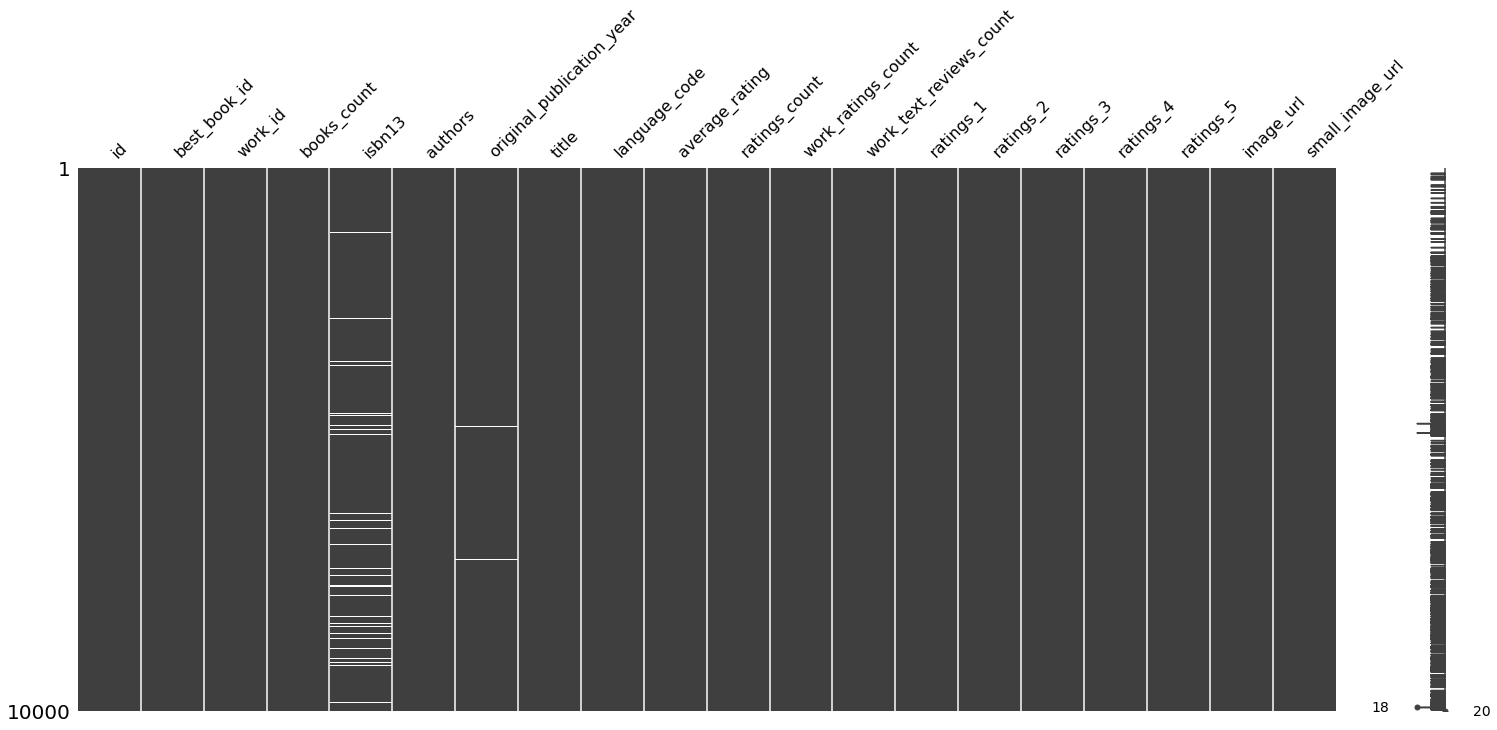

In [97]:
msno.matrix(books_data)

In [98]:
ratings_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [99]:
ratings_data.shape

(981756, 3)

In [100]:
ratings_data.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [101]:
book_tags_data.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [102]:
book_tags_data.shape

(999912, 3)

In [103]:
book_tags_data.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [104]:
tags_data.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [105]:
tags_data.shape

(34252, 2)

In [106]:
tags_data.isnull().sum()

tag_id      0
tag_name    0
dtype: int64

## Authors

## Cleaning the data for multiple authors so that the authors that are comma separated can be  splitted into multiple rows. This way they can come under proper analysis.

### Lets start with counting the total number of books by every author

In [107]:
books_data['authors'].value_counts()

Stephen King                                                                                                                                                                                                                              60
Nora Roberts                                                                                                                                                                                                                              59
Dean Koontz                                                                                                                                                                                                                               47
Terry Pratchett                                                                                                                                                                                                                           42
Agatha Christie                                     

### Now from the above analysis we can see that the author Dean Koontz have written 47 books. But this may not be correct as the script is picking up only those books which have only Dean Koontz as author and not the books where Dean Koontz is a co-author

### The below script will help us picking up values where Dean Koontz is a co author as well.

In [108]:
DKBooks = []
books_data['authors'].apply(lambda p: DKBooks.append(p) if 'Dean Koontz' in p else [])
DKBooks

['Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Richard Paige, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Kevin J. Anderson, Chuck Dixon, Brett Booth',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Kevin J. Anderson, Scott Brick',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Leigh Nichols, Dean Koontz',
 'Dean Koontz, Keith Szarabajka',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Leigh Nichols',
 'Dean Koontz',
 'Owen  West, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Ed Gorman, John Bedford Lloyd',
 'Dean Koontz',
 'K.R. Dwyer, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Leigh Nichols, Dean Koontz',
 'Leig

### So as per the actual analysis, the total books published by Dean Koontz is 64

In [109]:
len(DKBooks)

64

### The total number of books by multiple authors in the dataset are

In [110]:
len(auth_books)

0

### Trying to figure out the actual number of books written by a specific author so that it can be included in analysis

In [111]:
auth_books = []
books_data.authors.apply(lambda p: auth_books.append(p) if ',' in p else [])
auth_books[:20]

['J.K. Rowling, Mary GrandPré',
 'George Orwell, Erich Fromm, Celâl Üster',
 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'William Shakespeare, Robert           Jackson',
 'Paulo Coelho, Alan R. Clarke',
 'Charlotte Brontë, Michael Mason',
 'Mark Twain, John Seelye, Guy Cardwell',
 'E.B. White, Garth Williams, Rosemary Wells',
 'Emily Brontë, Richard J. Dunn',
 'Mary Wollstonecraft Shelley, Percy Bysshe Shelley, Maurice Hindle',
 'Jane Austen, Tony Tanner, Ros Ballaster',
 'Louis Sachar, Louis Sachar',
 'Homer, Robert Fagles, E.V. Rieu, Frédéric Mugler, Bernard Knox']

### Splitting the data with comma separated values and then removing the actual author column and joining with the new splitted column

In [112]:
splittedData = books_data['authors'].str.split(',').apply(Series, 1).stack()

In [113]:
splittedData.index = splittedData.index.droplevel(-1)

In [114]:
splittedData.name = 'authors'

In [115]:
del books_data['authors']

In [116]:
books_data=books_data.join(splittedData)

In [117]:
books_data[books_data['best_book_id']==843]

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,authors


In [118]:
books_data.head()

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,authors
0,1,2767052,2792775,272,9.780439e+12,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins
1,2,3,4640799,491,9.780440e+12,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,J.K. Rowling
1,2,3,4640799,491,9.780440e+12,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,Mary GrandPré
2,3,41865,3212258,226,9.780316e+12,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer
3,4,2657,3275794,487,9.780061e+12,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,Harper Lee


### Now as we can see that the authors data in the dataset is cleaned and now we have authors column splitted into multiple rows so that we have only one author per row.

### And this is proved by the following scripts.

In [119]:
auth_books = []
books_data.authors.apply(lambda p: auth_books.append(p) if ',' in p else [])
auth_books[:20]

[]

In [120]:
len(auth_books)

0

## Data Exploratory Analysis

### Understanding the outliars using box plots

### Drawing a box plot to understand the spread of average ratings.

<AxesSubplot:>

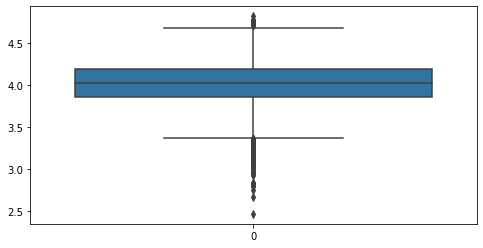

In [121]:
plt.figure(figsize=(8,4))
sns.boxplot(data=books_data['average_rating'])

### Drawing a box plot for understanding the spread of publication year.

<AxesSubplot:>

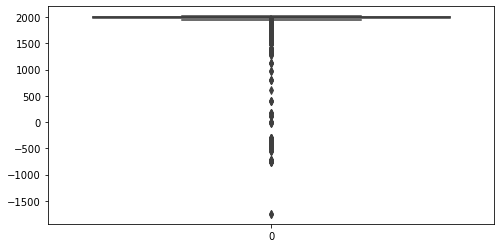

In [122]:
plt.figure(figsize=(8,4))
sns.boxplot(data=books_data['original_publication_year'])

### Drawing a scatter plot for understanding the distribution of ratings_5 vs average_ratings

<Figure size 2016x720 with 0 Axes>

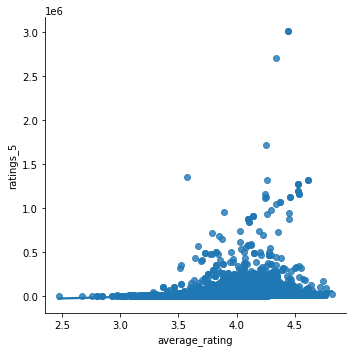

In [123]:
plt.figure(figsize=(28,10))
sns.lmplot(x='average_rating', y='ratings_5', data=books_data)

### Sorting data according to the average ratings

In [124]:
sortedData = books_data[books_data['ratings_count']>=1500]
sortedData = sortedData.sort_values('average_rating', ascending=False)
sortedData.head()

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,authors
3627,3628,24812,25599,14,9.780741e+12,2005.0,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...,Bill Watterson
3274,3275,8,21457576,11,9.780440e+12,2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Mary GrandPré
861,862,17332218,16482835,34,9.780765e+12,2014.0,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...,Brandon Sanderson
3274,3275,8,21457576,11,9.780440e+12,2003.0,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,J.K. Rowling
7946,7947,5031805,40769318,96,9.781434e+12,2002.0,ESV Study Bible,eng,4.76,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...,Lane T. Dennis


Text(0, 0.5, 'Book Title')

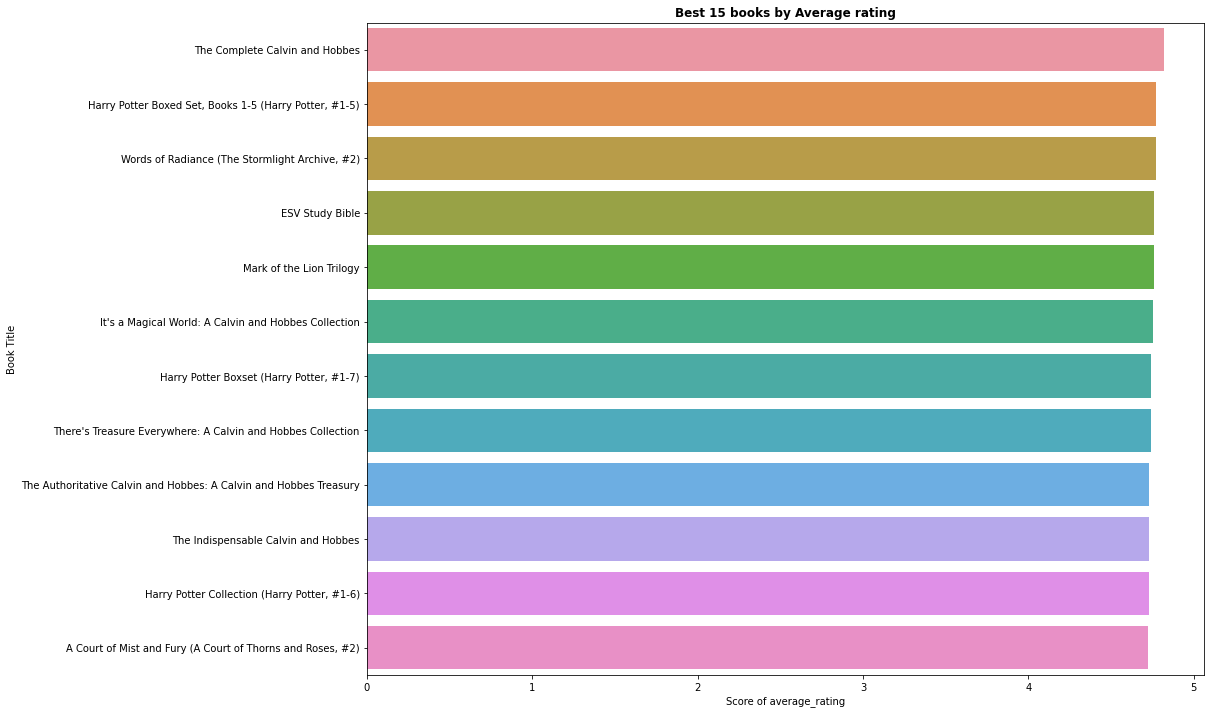

In [125]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=sortedData['average_rating'].head(15), y=sortedData['title'].head(15), data=sortedData)
plt.title('Best ' + str(15) + ' books by ' + 'average_rating'.replace('_',' ').capitalize(), weight='bold')
plt.xlabel('Score of ' + 'average_rating')
plt.ylabel('Book Title')

## Count of books written in different languages

In [126]:
langCounts = pd.DataFrame(books_data['language_code'].value_counts())
langCounts.columns = ['Total Counts']
langCounts = langCounts.sort_values('Total Counts', ascending=False)
langCounts

,Total Counts
eng,9471
en-US,2695
unknown,384
en-GB,345
ara,84
en-CA,71
fre,34
spa,24
ind,21
ger,21


In [127]:
len(langCounts)

26

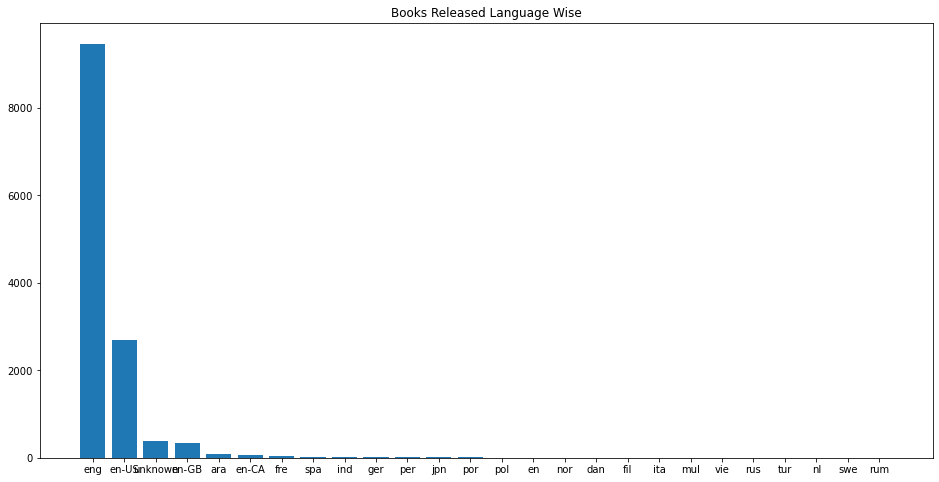

In [128]:
plt.figure(figsize=(16,8))
plt.title("Books Released Language Wise")
plt.bar(x=langCounts.index,height='Total Counts', data=langCounts);

In [129]:
langCounts = langCounts.drop(["en-US", "en-GB", "eng", "en-CA"])

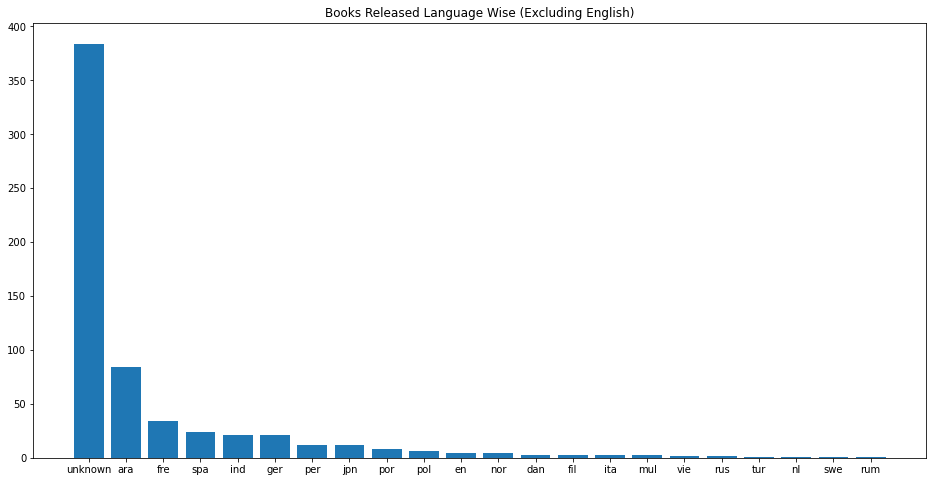

In [130]:
plt.figure(figsize=(16,8))
plt.title("Books Released Language Wise (Excluding English)")
plt.bar(x=langCounts.index,height='Total Counts', data=langCounts);

In [1]:
!jupyter nbconvert data_pre*.ipynb --to python

[NbConvertApp] Converting notebook data_preprocessing_chetan_nain.ipynb to python
[NbConvertApp] Writing 11877 bytes to data_preprocessing_chetan_nain.py


## Adding Summary Dataset

In [132]:
books_data.shape

(13216, 20)

In [133]:
data = []

with open("../data/booksummaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab')
    for row in tqdm(reader):
        data.append(row)

16559it [00:00, 27862.35it/s]


In [134]:
book_id = []
book_name = []
summary = []
genre = []

for i in tqdm(data):
    book_id.append(i[0])
    book_name.append(i[2])
    genre.append(i[5])
    summary.append(i[6])

books = pd.DataFrame({'book_id': book_id, 'book_name': book_name,
                       'genre': genre, 'summary': summary})
books.head(2)

100%|█████████████████████████████████| 16559/16559 [00:00<00:00, 980095.39it/s]


,book_id,book_name,genre,summary
0,620,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."


In [140]:
books.rename(columns = {'book_name':'title'}, inplace = True)

In [141]:
books.drop(books[books['genre']==''].index, inplace=True)
books[books['genre']=='']

,book_id,title,genre,summary,genre_new,clean_summary


In [142]:
genres = []
for i in books['genre']:
    genres.append(list(json.loads(i).values()))
books['genre_new'] = genres

In [143]:
all_genres = sum(genres,[])
len(set(all_genres))

227

In [144]:
def clean_summary(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [145]:
books_data['title'] = books_data['title'].apply(lambda x: clean_summary(x))
books_data.head(2)

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,authors
0,1,2767052,2792775,272,9.780439e+12,2008.0,the hunger games the hunger games,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins
1,2,3,4640799,491,9.780440e+12,1997.0,harry potter and the sorcerers stone harry potter,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,J.K. Rowling


In [146]:
books['clean_summary'] = books['summary'].apply(lambda x: clean_summary(x))
books.head(2)

,book_id,title,genre,summary,genre_new,clean_summary
0,620,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ...",old major the old boar on the manor farm calls...
1,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction...",alex a teenager living in near future england ...


In [148]:
books['title'] = books['title'].apply(lambda x: clean_summary(x))
books.head(2)

,book_id,title,genre,summary,genre_new,clean_summary
0,620,animal farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ...",old major the old boar on the manor farm calls...
1,843,a clockwork orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction...",alex a teenager living in near future england ...


In [149]:
merged_df=books_data.merge(books, on='title', how='left')

In [150]:
merged_df.head(20)

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,...,ratings_4,ratings_5,image_url,small_image_url,authors,book_id,genre,summary,genre_new,clean_summary
0,1,2767052,2792775,272,9.780439e+12,2008.0,the hunger games the hunger games,eng,4.34,4780653,...,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,NaN,NaN,NaN,NaN,NaN
1,2,3,4640799,491,9.780440e+12,1997.0,harry potter and the sorcerers stone harry potter,eng,4.44,4602479,...,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,J.K. Rowling,NaN,NaN,NaN,NaN,NaN
2,2,3,4640799,491,9.780440e+12,1997.0,harry potter and the sorcerers stone harry potter,eng,4.44,4602479,...,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,Mary GrandPré,NaN,NaN,NaN,NaN,NaN
3,3,41865,3212258,226,9.780316e+12,2005.0,twilight twilight,en-US,3.57,3866839,...,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,NaN,NaN,NaN,NaN,NaN
4,4,2657,3275794,487,9.780061e+12,1960.0,to kill a mockingbird,eng,4.25,3198671,...,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,Harper Lee,73408,"{""/m/02xlf"": ""Fiction""}",The book opens with the Finch family's ancest...,[Fiction],the book opens with the finch familys ancestor...
5,5,4671,245494,1356,9.780743e+12,1925.0,the great gatsby,eng,3.89,2683664,...,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,F. Scott Fitzgerald,76033,"{""/m/02xlf"": ""Fiction"", ""/m/05hgj"": ""Novel""}","The story begins with the narrator, Nick Carr...","[Fiction, Novel]",the story begins with the narrator nick carraw...
6,6,11870085,16827462,226,9.780525e+12,2012.0,the fault in our stars,eng,4.26,2346404,...,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,John Green,32262844,"{""/m/03mfnf"": ""Young adult literature""}","Narrator Hazel Grace Lancaster, a sixteen-yea...",[Young adult literature],narrator hazel grace lancaster a sixteen year ...
7,7,5907,1540236,969,9.780618e+12,1937.0,the hobbit,en-US,4.25,2071616,...,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,J.R.R. Tolkien,30292,"{""/m/0dwly"": ""Children's literature"", ""/m/017s...",Gandalf tricks Bilbo into hosting a party for...,"[Children's literature, Juvenile fantasy, Adve...",gandalf tricks bilbo into hosting a party for ...
8,8,5107,3036731,360,9.780317e+12,1951.0,the catcher in the rye,eng,3.79,2044241,...,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,J.D. Salinger,186258,"{""/m/0hgws"": ""First-person narrative"", ""/m/02x...",The majority of the novel takes place over tw...,"[First-person narrative, Fiction, Bildungsroma...",the majority of the novel takes place over two...
9,9,960,3338963,311,9.781417e+12,2000.0,angels demons robert langdon,en-CA,3.85,2001311,...,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,Dan Brown,NaN,NaN,NaN,NaN,NaN


In [151]:
merged_df.shape

(14420, 25)

In [152]:
merged_df.isnull().sum()

id                               0
best_book_id                     0
work_id                          0
books_count                      0
isbn13                        1151
original_publication_year       37
title                            0
language_code                    0
average_rating                   0
ratings_count                    0
work_ratings_count               0
work_text_reviews_count          0
ratings_1                        0
ratings_2                        0
ratings_3                        0
ratings_4                        0
ratings_5                        0
image_url                        0
small_image_url                  0
authors                          0
book_id                      11121
genre                        11121
summary                      11121
genre_new                    11121
clean_summary                11121
dtype: int64

In [154]:
books_data['summary']=''

In [212]:
dummy_data=books_data.head(10)

In [222]:
# split = dummy_data['isbn13'].str.split(',', 1, expand=True)
dummy_data['isbn13'] = dummy_data['isbn13'].astype(int)
dummy_data

,id,best_book_id,work_id,books_count,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,authors,summary
0,1,2767052,2792775,272,9780439023480,2008.0,the hunger games the hunger games,eng,4.34,4780653,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,
1,2,3,4640799,491,9780439554930,1997.0,harry potter and the sorcerers stone harry potter,eng,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,J.K. Rowling,
1,2,3,4640799,491,9780439554930,1997.0,harry potter and the sorcerers stone harry potter,eng,4.44,4602479,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,Mary GrandPré,
2,3,41865,3212258,226,9780316015840,2005.0,twilight twilight,en-US,3.57,3866839,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,
3,4,2657,3275794,487,9780061120080,1960.0,to kill a mockingbird,eng,4.25,3198671,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,Harper Lee,
4,5,4671,245494,1356,9780743273560,1925.0,the great gatsby,eng,3.89,2683664,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,F. Scott Fitzgerald,
5,6,11870085,16827462,226,9780525478810,2012.0,the fault in our stars,eng,4.26,2346404,...,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,John Green,
6,7,5907,1540236,969,9780618260300,1937.0,the hobbit,en-US,4.25,2071616,...,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,J.R.R. Tolkien,
7,8,5107,3036731,360,9780316769170,1951.0,the catcher in the rye,eng,3.79,2044241,...,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,J.D. Salinger,
8,9,960,3338963,311,9781416524790,2000.0,angels demons robert langdon,en-CA,3.85,2001311,...,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,Dan Brown,


In [203]:
API_URL = "https://www.googleapis.com/books/v1/volumes?q=isbn:"

In [204]:
df_isbn['isbn'] = df_isbn.head(10)
df_isbn

0                                         9780439023480.0
1                                         9780439554930.0
1                                         9780439554930.0
2                                         9780316015840.0
3                                         9780061120080.0
4                                         9780743273560.0
5                                         9780525478810.0
6                                         9780618260300.0
7                                         9780316769170.0
8                                         9781416524790.0
isbn    0    9780439023480.0
1    9780439554930.0
1   ...
Name: isbn13, dtype: object

In [209]:
for row in tqdm(df_isbn):
    req = "https://www.googleapis.com/books/v1/volumes?q=isbn:" + ""
    res = urllib.request.urlopen(req)
    result = json.loads(res.read().decode('utf-8'))
    print(result['items'][0]['volumeInfo']['description'])

  0%|                                                    | 0/11 [00:00<?, ?it/s]


TypeError: 'float' object is not subscriptable

In [239]:
for index, row in books_data.iterrows():
    req = "https://www.googleapis.com/books/v1/volumes?q=isbn:" + str(row['isbn13'])
    res = urllib.request.urlopen(req)
    result = json.loads(res.read().decode('utf-8'))
    if 'items' in result:
        time.sleep(.5)
        if 'volumeInfo' in result['items'][0]:
            if 'description' in result['items'][0]['volumeInfo']:
                row['summary']=result['items'][0]['volumeInfo']['description']
    else:
        row['summary']=np.nan

HTTPError: HTTP Error 429: Too Many Requests

In [ ]:
books_data.head(20)